# McKinney Chapter 5 - Getting Started with pandas

## Introduction

pandas will be our primary tool for the rest of the semester.
pandas is an abbrviation for ***pan***el ***da***ta, which provide time-stamped data for multiple individuals or firms.
Chapter 5 of Wes McKinney's [*Python for Data Analysis*](https://wesmckinney.com/pages/book.html) discusses the fundamentals of pandas.

***Note:*** Indented block quotes are from McKinney, and section numbers differ from McKinney because we will not discuss every topic.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

> pandas will be a major tool of interest throughout much of the rest of the book. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. pandas is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy's idiomatic style of array-based computing, especially array-based functions and a preference for data processing without for loops. 
>
> While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.

We will use pandas---a wrapper for NumPy that helps us manipulate and combine data---every day for the rest of the course.

## Introduction to pandas Data Structures

> To get started with pandas, you will need to get comfortable with its two workhorse data structures: Series and DataFrame. While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

### Series

> A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data.

The early examples use integer and string labels, but date-time labels are most useful.

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Contrast `obj` with a NumPy array equivalent:

In [4]:
np.array([4, 7, -5, 3])

array([ 4,  7, -5,  3])

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

We did not explicitly assign an index, so `obj` has an integer index that starts at 0.
We can also explicitly assign an index.

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [9]:
obj2['a']

-5

In [10]:
obj2[2]

-5

In [11]:
obj2['d'] = 6

In [12]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [13]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

A pandas series behaves like a NumPy array.
We can use Boolean filters and perform vectorized mathematical operations.

In [14]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [15]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [16]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [17]:
'b' in obj2

True

In [18]:
'e' in obj2

False

We can create a pandas series from a dictionary.
The dictionary labels become the series index.

In [19]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

We can create a pandas series from a list, too.
Note that pandas respects the order of the assigned index.
Also, pandas keeps California with `NaN` (not a number or missing value) and drops Utah because it was not in the index.

In [20]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California          NaN
Ohio         35000.0000
Oregon       16000.0000
Texas        71000.0000
dtype: float64

Indices are one of pandas' super powers.
When we perform mathematical operations, pandas aligns series by their indices.

Here `NaN` is "not a number", which indicates missing values.
`NaN` is considered a float, so the data type switches from int64 to float64.

In [21]:
obj3 + obj4

California           NaN
Ohio          70000.0000
Oregon        32000.0000
Texas        142000.0000
Utah                 NaN
dtype: float64

### DataFrame

A pandas data frame is like a worksheet in an Excel workbook with row and columns that provide fast indexing.

> A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. The exact details of DataFrame’s internals are outside the scope of this book.
>
> There are many ways to construct a DataFrame, though one of the most common is from a dict of equal-length lists or NumPy arrays:


In [22]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002, 2003],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)

In [23]:
frame

,state,year,pop
0,Ohio,2000,1.5000
1,Ohio,2001,1.7000
2,Ohio,2002,3.6000
3,Nevada,2001,2.4000
4,Nevada,2002,2.9000
5,Nevada,2003,3.2000


We did not specify an index, so `frame` has the default index of integers starting at 0.

In [24]:
frame2 = pd.DataFrame(
    data, 
    columns=['year', 'state', 'pop', 'debt'],
    index=['one', 'two', 'three', 'four', 'five', 'six']
)

In [25]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,NaN
two,2001,Ohio,1.7000,NaN
three,2002,Ohio,3.6000,NaN
four,2001,Nevada,2.4000,NaN
five,2002,Nevada,2.9000,NaN
six,2003,Nevada,3.2000,NaN


If we extract one column (via `df.column` or `df['column']`), the result is a series.
We can access data frame columns with either the `df.colname` or the `df['colname']` syntax.
However, we can only create data frame columns with the `df['colname']` syntax.

In [26]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [27]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

Similarly, if we extract one row (via `df.loc['rowlabel']` or `df.iloc[rownumber]`), the result is a series.

In [28]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,NaN
two,2001,Ohio,1.7000,NaN
three,2002,Ohio,3.6000,NaN
four,2001,Nevada,2.4000,NaN
five,2002,Nevada,2.9000,NaN
six,2003,Nevada,3.2000,NaN


In [29]:
frame2.loc['one']

year      2000
state     Ohio
pop     1.5000
debt       NaN
Name: one, dtype: object

A data frame has two dimensions, so we have to slice more precisely than with series.

1. The `.loc[]` method slices by row labels and column names
1. The `.iloc[]` method slices by *integer* row and label indices

In [30]:
frame2.loc['three']

year      2002
state     Ohio
pop     3.6000
debt       NaN
Name: three, dtype: object

In [31]:
frame2.loc['three', 'state'] # row, column

'Ohio'

In [32]:
frame2.iloc[2]

year      2002
state     Ohio
pop     3.6000
debt       NaN
Name: three, dtype: object

We can assign either scalars or arrays (or lists) to data frame columns.

In [33]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,NaN
two,2001,Ohio,1.7000,NaN
three,2002,Ohio,3.6000,NaN
four,2001,Nevada,2.4000,NaN
five,2002,Nevada,2.9000,NaN
six,2003,Nevada,3.2000,NaN


In [34]:
frame2['debt'] = 16.5

In [35]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,16.5000
two,2001,Ohio,1.7000,16.5000
three,2002,Ohio,3.6000,16.5000
four,2001,Nevada,2.4000,16.5000
five,2002,Nevada,2.9000,16.5000
six,2003,Nevada,3.2000,16.5000


In [36]:
frame2['debt'] = np.arange(6.)

In [37]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,0.0000
two,2001,Ohio,1.7000,1.0000
three,2002,Ohio,3.6000,2.0000
four,2001,Nevada,2.4000,3.0000
five,2002,Nevada,2.9000,4.0000
six,2003,Nevada,3.2000,5.0000


If we assign a series to a data frame column, pandas will use the index to align it with the data frame.
Data frame rows that are not in the series become missing values `NaN`.

In [38]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val

In [39]:
val

two    -1.2000
four   -1.5000
five   -1.7000
dtype: float64

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,NaN
two,2001,Ohio,1.7000,-1.2000
three,2002,Ohio,3.6000,NaN
four,2001,Nevada,2.4000,-1.5000
five,2002,Nevada,2.9000,-1.7000
six,2003,Nevada,3.2000,NaN


We can add columns to our data frame, then delete them with `del`.

In [41]:
frame2['eastern'] = frame2.state == 'Ohio'

In [42]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5000,NaN,True
two,2001,Ohio,1.7000,-1.2000,True
three,2002,Ohio,3.6000,NaN,True
four,2001,Nevada,2.4000,-1.5000,False
five,2002,Nevada,2.9000,-1.7000,False
six,2003,Nevada,3.2000,NaN,False


In [43]:
del frame2['eastern']

In [44]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5000,NaN
two,2001,Ohio,1.7000,-1.2000
three,2002,Ohio,3.6000,NaN
four,2001,Nevada,2.4000,-1.5000
five,2002,Nevada,2.9000,-1.7000
six,2003,Nevada,3.2000,NaN


### Index Objects

In [45]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index

In [46]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable!

In [47]:
# index[1] = 'd'  # TypeError: Index does not support mutable operations

In [48]:
labels = pd.Index(np.arange(3))

In [49]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [50]:
obj2

0    1.5000
1   -2.5000
2    0.0000
dtype: float64

Indices can contain duplicates, so an index does not guarantee our data are duplicate-free.

In [51]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

## Essential Functionality

This section provides the most import pandas operations.
It is difficult to provide an exhaustive reference, but this section provides a head start on the core pandas functionality.

### Dropping Entries from an Axis

> Dropping one or more entries from an axis is easy if you already have an index array or list without those entries. As that can require a bit of munging and set logic, the  drop method will return a new object with the indicated value or values deleted from an axis.

In [52]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [53]:
obj

a   0.0000
b   1.0000
c   2.0000
d   3.0000
e   4.0000
dtype: float64

In [54]:
obj_without_d_and_c = obj.drop(['d', 'c'])

In [55]:
obj

a   0.0000
b   1.0000
c   2.0000
d   3.0000
e   4.0000
dtype: float64

In [56]:
obj_without_d_and_c

a   0.0000
b   1.0000
e   4.0000
dtype: float64

Note that we need to use the `inplace=True` argument to `.drop()` to change `obj`.

In [57]:
obj_copy = obj.copy()

In [58]:
obj_copy.drop(['d', 'c'], inplace=True)

In [59]:
obj_copy

a   0.0000
b   1.0000
e   4.0000
dtype: float64

The `.drop()` method works on data frames, too.

In [60]:
data = pd.DataFrame(
    np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four']
)

In [61]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [62]:
data.drop(['Colorado', 'Ohio']) # implied ", axis=0"

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data.drop(index=['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


The `.drop()` method accepts an `axis` argument and the default is `axis=0` to drop rows based on labels.
To drop columns, we use `axis=1` or `axis='columns'`.

In [64]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [65]:
data.drop(columns='two')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [66]:
data.drop(['two', 'four'], axis='columns') # axis='columns' is the same as axis=1

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, Selection, and Filtering

Indexing, selecting, and filtering will be among our most-used pandas features.

> Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series's index values instead of only integers.  

In [67]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [68]:
obj

a   0.0000
b   1.0000
c   2.0000
d   3.0000
dtype: float64

In [69]:
obj['b']

1.0000

In [70]:
obj[1]

1.0000

The code directly above works, but when we index/slice by integers, we should use `.iloc[]`.
We should be as explicit as possible!

In [71]:
obj.iloc[1]

1.0000

In [72]:
obj.iloc[1:3]

b   1.0000
c   2.0000
dtype: float64

In [73]:
obj.loc['b':'d'] # STRING SLICES ARE INCLUSIVE ON BOTH ENDS!!!

b   1.0000
c   2.0000
d   3.0000
dtype: float64

In [74]:
obj[['b', 'a', 'd']]

b   1.0000
a   0.0000
d   3.0000
dtype: float64

In [75]:
obj[[1, 3]]

b   1.0000
d   3.0000
dtype: float64

In [76]:
obj[obj < 2]

a   0.0000
b   1.0000
dtype: float64

When we slice with labels, the left and right endpoints are inclusive.

In [77]:
obj['b':'c']

b   1.0000
c   2.0000
dtype: float64

In [78]:
obj['b':'c'] = 5

In [79]:
obj

a   0.0000
b   5.0000
c   5.0000
d   3.0000
dtype: float64

In [80]:
data = pd.DataFrame(
    np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four']
)

Indexing one column returns a series.

In [81]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

Indexing two or more columns returns a data frame.

In [82]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


If we want a data frame with one column, we can use `[[]]`:

In [83]:
data['three']

Ohio         2
Colorado     6
Utah        10
New York    14
Name: three, dtype: int64

In [84]:
data[['three']]

,three
Ohio,2
Colorado,6
Utah,10
New York,14


When we slice with integer indices with `[]`, we slice rows.

In [85]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


When I slice rows, I prefer to use `.loc[]` or `.iloc[]`.

In [86]:
data.iloc[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


We can index a data frame with Booleans, as we did with NumPy arrays.

In [87]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [88]:
data[data < 5] = 0

> For DataFrame label-indexing on the rows, I introduce the special indexing operators loc and iloc. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (loc) or integers (iloc).

In [89]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [90]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [91]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [92]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


If we want to combine integer, label, and Boolean indices, we can chain the indices.

In [93]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [94]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


***Table 5-4*** summarizes the data frame indexing options:

- `df[val]`: Select single column or sequence of columns from the DataFrame; special case conveniences: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criterion)
- `df.loc[val]`: Selects single row or subset of rows from the DataFrame by label
- `df.loc[:, val]`: Selects single column or subset of columns by label
- `df.loc[val1, val2]`: Select both rows and columns by label
- `df.iloc[where]`: Selects single row or subset of rows from the DataFrame by integer position
- `df.iloc[:, where]`: Selects single column or subset of columns by integer position
- `df.iloc[where_i, where_j]`: Select both rows and columns by integer position
- `df.at[label_i, label_j]`: Select a single scalar value by row and column label
- `df.iat[i, j]`: Select a single scalar value by row and column position (integers) reindex method Select either rows or columns by labels
- `get_value`, `set_value` methods: Select single value by row and column label

pandas is powerful and these options can be overwhelming!
We will typically use `df[val]` to select columns (here `val` is either a string or list of strings), `df.loc[val]` to select rows (here `val` is a row label), and `df.loc[val1, val2]` to select both rows and columns.
The other options add flexibility, and we may occasionally use them.
However, our data will be large enough that counting row and column number will be tedious, making `.iloc[]` impractical.

### Integer Indexes

In [95]:
ser = pd.Series(np.arange(3.))
ser

0   0.0000
1   1.0000
2   2.0000
dtype: float64

The following indexing yields an error because the series cannot fall back to NumPy array indexing.
Falling back to NumPy array indexing here would generate many subtle bugs elsewhere.

In [96]:
# ser[-1]

In [97]:
ser.iloc[-1]

2.0000

However, the following indexing works fine because with string labels there is no ambiguity.

In [98]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [99]:
ser2[-1]

2.0000

In [100]:
ser[:1]

0   0.0000
dtype: float64

In [101]:
ser.loc[:1]

0   0.0000
1   1.0000
dtype: float64

In [102]:
ser.iloc[:1]

0   0.0000
dtype: float64

In practice, these errors should not be an issue because we will index with stock identifiers and dates.
Further, we will (almost) never index or subset a data frame by integers except for with the `.iloc[]` method.

### Arithmetic and Data Alignment

> An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. For users with database experience, this is similar to an automatic outer join on the index labels. 

In [103]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [104]:
s1 + s2

a   5.2000
c   1.1000
d      NaN
e   0.0000
f      NaN
g      NaN
dtype: float64

In [105]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [106]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0000,NaN,6.0000,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0000,NaN,12.0000,NaN
Utah,NaN,NaN,NaN,NaN


In [107]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

In [108]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [109]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan

In [110]:
df1

,a,b,c,d
0,0.0000,1.0000,2.0000,3.0000
1,4.0000,5.0000,6.0000,7.0000
2,8.0000,9.0000,10.0000,11.0000


In [111]:
df2

,a,b,c,d,e
0,0.0000,1.0000,2.0000,3.0000,4.0000
1,5.0000,NaN,7.0000,8.0000,9.0000
2,10.0000,11.0000,12.0000,13.0000,14.0000
3,15.0000,16.0000,17.0000,18.0000,19.0000


In [112]:
df1 + df2

,a,b,c,d,e
0,0.0000,2.0000,4.0000,6.0000,NaN
1,9.0000,NaN,13.0000,15.0000,NaN
2,18.0000,20.0000,22.0000,24.0000,NaN
3,NaN,NaN,NaN,NaN,NaN


We can specify a fill value for `NaN` values.
Note that pandas fills would-be `NaN` values in each data frame *before* the arithmetic operation.

In [113]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0000,2.0000,4.0000,6.0000,4.0000
1,9.0000,5.0000,13.0000,15.0000,9.0000
2,18.0000,20.0000,22.0000,24.0000,14.0000
3,15.0000,16.0000,17.0000,18.0000,19.0000


#### Operations between DataFrame and Series

In [114]:
arr = np.arange(12.).reshape((3, 4))

In [115]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [116]:
arr[0]

array([0., 1., 2., 3.])

In [117]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Arithmetic operations between series and data frames behave the same as the example above.

In [118]:
frame = pd.DataFrame(
    np.arange(12.).reshape((4, 3)),
    columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon']
)
series = frame.iloc[0]

In [119]:
frame

,b,d,e
Utah,0.0000,1.0000,2.0000
Ohio,3.0000,4.0000,5.0000
Texas,6.0000,7.0000,8.0000
Oregon,9.0000,10.0000,11.0000


In [120]:
series

b   0.0000
d   1.0000
e   2.0000
Name: Utah, dtype: float64

In [121]:
frame - series

,b,d,e
Utah,0.0000,0.0000,0.0000
Ohio,3.0000,3.0000,3.0000
Texas,6.0000,6.0000,6.0000
Oregon,9.0000,9.0000,9.0000


In [122]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [123]:
frame + series2

,b,d,e,f
Utah,0.0000,NaN,3.0000,NaN
Ohio,3.0000,NaN,6.0000,NaN
Texas,6.0000,NaN,9.0000,NaN
Oregon,9.0000,NaN,12.0000,NaN


In [124]:
series3 = frame['d']

In [125]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0000,0.0000,1.0000
Ohio,-1.0000,0.0000,1.0000
Texas,-1.0000,0.0000,1.0000
Oregon,-1.0000,0.0000,1.0000


### Function Application and Mapping

In [126]:
np.random.seed(42)
frame = pd.DataFrame(
    np.random.randn(4, 3), 
    columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon']
)

In [127]:
frame

,b,d,e
Utah,0.4967,-0.1383,0.6477
Ohio,1.5230,-0.2342,-0.2341
Texas,1.5792,0.7674,-0.4695
Oregon,0.5426,-0.4634,-0.4657


In [128]:
np.abs(frame) # np.abs() returns the absolute value

,b,d,e
Utah,0.4967,0.1383,0.6477
Ohio,1.5230,0.2342,0.2341
Texas,1.5792,0.7674,0.4695
Oregon,0.5426,0.4634,0.4657


In [129]:
frame.apply(np.abs)

,b,d,e
Utah,0.4967,0.1383,0.6477
Ohio,1.5230,0.2342,0.2341
Texas,1.5792,0.7674,0.4695
Oregon,0.5426,0.4634,0.4657


> Another frequent operation is applying a function on one-dimensional arrays to each column or row. DataFrame’s apply method does exactly this:

In [130]:
frame

,b,d,e
Utah,0.4967,-0.1383,0.6477
Ohio,1.5230,-0.2342,-0.2341
Texas,1.5792,0.7674,-0.4695
Oregon,0.5426,-0.4634,-0.4657


In [131]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b   1.0825
d   1.2309
e   1.1172
dtype: float64

In [132]:
frame.apply(f, axis=1)

Utah     0.7860
Ohio     1.7572
Texas    2.0487
Oregon   1.0083
dtype: float64

Note that we can use anonymous (lambda) functions "on the fly":

In [133]:
frame.apply(lambda x: x.max() - x.min(), axis=1)

Utah     0.7860
Ohio     1.7572
Texas    2.0487
Oregon   1.0083
dtype: float64

Here is an example of the speed costs of `.apply()`:

In [134]:
%timeit frame['e'].abs()

19 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [135]:
%timeit frame['e'].apply(np.abs)

44.2 µs ± 939 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Summarizing and Computing Descriptive Statistics

In [136]:
df = pd.DataFrame(
    [[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
    index=['a', 'b', 'c', 'd'],
    columns=['one', 'two']
)

In [137]:
df

,one,two
a,1.4000,NaN
b,7.1000,-4.5000
c,NaN,NaN
d,0.7500,-1.3000


In [138]:
df.sum()

one    9.2500
two   -5.8000
dtype: float64

In [139]:
df.sum(axis=1)

a    1.4000
b    2.6000
c    0.0000
d   -0.5500
dtype: float64

In [140]:
df.mean(axis=1, skipna=False)

a       NaN
b    1.3000
c       NaN
d   -0.2750
dtype: float64

The `.idxmax()` method returns the label for the maximum observation.

In [141]:
df.idxmax()

one    b
two    d
dtype: object

The `.describe()` returns summary statistics for each numerical column in a data frame.

In [142]:
df.describe()

,one,two
count,3.0000,2.0000
mean,3.0833,-2.9000
std,3.4937,2.2627
min,0.7500,-4.5000
25%,1.0750,-3.7000
50%,1.4000,-2.9000
75%,4.2500,-2.1000
max,7.1000,-1.3000


For non-numerical data, `.describe()` returns alternative summary statistics.

In [143]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [144]:
df

,one,two
a,1.4000,NaN
b,7.1000,-4.5000
c,NaN,NaN
d,0.7500,-1.3000


### Correlation and Covariance

To explore correlation and covariance methods, we can use Yahoo! Finance stock data.
We can use the yfinance package to import these data.
We can use the requests-cache package to cache our data requests, which avoid unnecessarily re-downloading data.

We can install these two functions with the `%pip` magic:

In [145]:
# %pip install yfinance requests-cache

If we are running Python locally, we only need to run the `%pip` magic once.
If we are running Python on DataCamp, we only need to run the `%pip` magic once *per workspace*.

In [146]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

In [147]:
stocks = yf.download(tickers=['AAPL', 'IBM', 'MSFT', 'GOOG'], session=session)

[*********************100%***********************]  4 of 4 completed


Here `stocks` contains daily data for AAPL, IBM, MSFT, and GOOG.
We calculate returns with the `.pct_change()` of the `Adj Close` column.
The `Adj Close` column is a reverse-engineered daily closing price the includes dividends paid.
Therefore, the percent change in adjusted closes considers both price changs (i.e., capital gains) and dividends:

$$R_t = \frac{(P_t + D_t) - P_{t-1}}{P_{t-1}} = \frac{\text{Adj Close}_t - \text{Adj Close}_{t-1}}{\text{Adj Close}_{t-1}}$$

In [148]:
returns = stocks['Adj Close'].pct_change()

We multiply by 252 to annualize mean daily returns because means grow linearly with time and there are (about) 252 trading days per year.

In [149]:
returns.mean().mul(252)

AAPL   0.2774
GOOG   0.2506
IBM    0.1029
MSFT   0.2840
dtype: float64

We multiply by $\sqrt{252}$ to annualize the standard deviation of daily returns because variances grow linearly with time, there are (about) 252 trading days per year, and the standard deviation is the square root of the variance.

In [150]:
returns.std().mul(np.sqrt(252))

AAPL   0.4492
GOOG   0.3056
IBM    0.2526
MSFT   0.3382
dtype: float64

***The best explanation I have found on why stock return volatility (the standard deviation of stocks returns) grows with the square root of time is at the bottom of page 7 of [chapter 8 of Ivo Welch's free corporate finance textbook](https://book.ivo-welch.info/read/source5.mba/08-invchoice.pdf).***

---

***SIDEBAR, THAT IS A FEW WEEKS EARLY***
We find similar means is we convert our daily returns to annual returns, then use calculate the means of annual returns.
We will learn more about `.resample('A')` in a few weeks.

In [151]:
returns.loc['2005':'2021'].mean().mul(252)

AAPL   0.3603
GOOG   0.2439
IBM    0.0748
MSFT   0.2057
dtype: float64

In [152]:
returns.loc['2005':'2021'].add(1).resample('A').prod().sub(1).mean()

AAPL   0.4606
GOOG   0.2912
IBM    0.0682
MSFT   0.2178
dtype: float64

In [153]:
returns.loc['2005':'2021'].std().mul(np.sqrt(252))

AAPL   0.3294
GOOG   0.2954
IBM    0.2306
MSFT   0.2706
dtype: float64

In [154]:
returns.loc['2005':'2021'].add(1).resample('A').prod().sub(1).std()

AAPL   0.5406
GOOG   0.4170
IBM    0.2115
MSFT   0.2713
dtype: float64

---

We can calculate pairwise correlations.

In [155]:
returns['MSFT'].corr(returns['IBM'])

0.4448

We can also calculate correlation matrices.

In [156]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.0000,0.5133,0.3686,0.4265
GOOG,0.5133,1.0000,0.4053,0.5544
IBM,0.3686,0.4053,1.0000,0.4448
MSFT,0.4265,0.5544,0.4448,1.0000


In [157]:
returns.corr().loc['MSFT', 'IBM']

0.4448

Or manually with `.cov()` and `std()` methods because $$Corr(x, y) = \frac{Cov(x, y)}{Std(x) \times Std(y)}.$$
Note that we have to explicitly subset to the same dates for both tickers because otherwise we would use different data for the covariances and standard deviations.

***Here is the wrong way!***
The following is wrong because pandas will use different data for the `.cov()` and `.std()` calculations.
When possible, use a pre-built function or method to avoid silent failures!

In [158]:
returns.cov().loc['MSFT', 'IBM'] / (returns['MSFT'].std() * returns['IBM'].std())

0.4822

***The following is correct, but tedious since it requires a disposable data frame `_` that we only use in this cell!***
There is nothing special about `_`, it is just commonly used for disposable variables that we do not plan to reuse.

In [159]:
_ = returns[['MSFT', 'IBM']].dropna()
_.cov().loc['MSFT', 'IBM'] / (_['MSFT'].std() * _['IBM'].std())

0.4448

We can also chain all these commands into one line of code.
Using one long chain avoids temporary variables and is often easier to read, because chains read like sentences.
However, this is unnecessarily complex since we have the `.corr()` method!

In [160]:
returns[['MSFT', 'IBM']].dropna().pipe(lambda x: x.cov().loc['MSFT', 'IBM'] / (x['MSFT'].std() * x['IBM'].std()))

0.4448

We can make long chains more readable by wrapping them in `()` and inserting line breaks.

In [161]:
(
    returns[['MSFT', 'IBM']]
    .dropna()
    .pipe(lambda x: x.cov().loc['MSFT', 'IBM'] / (x['MSFT'].std() * x['IBM'].std()))
)

0.4448

## Practice

***Practice:***
Slice the row in `df` with the largest value in column `one`.

In [162]:
df = pd.DataFrame(
    [[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
    index=['a', 'b', 'c', 'd'],
    columns=['one', 'two']
)

In [163]:
df.loc[df['one'] == df['one'].max()]

,one,two
b,7.1000,-4.5000


Here is the more Pythonic/pandas-like solution that uses the `.idxmax()` method.

In [164]:
df.loc[df['one'].idxmax()]

one    7.1000
two   -4.5000
Name: b, dtype: float64

If we really want to return a data frame, we can wrap the `.idxmax()` with `[]`.

In [165]:
df.loc[[df['one'].idxmax()]]

,one,two
b,7.1000,-4.5000


***Practice:***
Slice the column in `df` with the largest value in row `a`.

In [166]:
df.loc[:, df.loc['a'] == df.loc['a'].max()]

,one
a,1.4000
b,7.1000
c,NaN
d,0.7500


In [167]:
df[df.loc['a'].idxmax()]

a   1.4000
b   7.1000
c      NaN
d   0.7500
Name: one, dtype: float64

In [168]:
df.loc[:, df.loc['a'].idxmax()]

a   1.4000
b   7.1000
c      NaN
d   0.7500
Name: one, dtype: float64

***Practice:***
Calculate the correlation matrix for these four stocks using data from 2010 through 2015.

In [169]:
stocks = yf.download(tickers=['AAPL', 'IBM', 'MSFT', 'GOOG'], session=session)

[*********************100%***********************]  4 of 4 completed


In [170]:
returns = stocks['Adj Close'].pct_change()

In [171]:
returns.loc['2010':'2015'].corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.0000,0.4054,0.3981,0.3798
GOOG,0.4054,1.0000,0.4136,0.4447
IBM,0.3981,0.4136,1.0000,0.5083
MSFT,0.3798,0.4447,0.5083,1.0000


***Practice:***
Calculate the correlation matrix for these four stocks using data from 2016 through today.

In [172]:
returns.loc['2016':].corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.0000,0.6606,0.4134,0.7251
GOOG,0.6606,1.0000,0.4302,0.7767
IBM,0.4134,0.4302,1.0000,0.4679
MSFT,0.7251,0.7767,0.4679,1.0000


***Practice:***
Calculate the cumulative returns for these four stocks for 2020 through today.
We can compound returns as: $$1 + R_{cumulative,T} = \prod_{t=1}^T 1 + R_t.$$ 
We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

In [173]:
returns.loc['2020':].add(1).cumprod().sub(1)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2020-01-02,0.0228,0.0227,0.0103,0.0185
2020-01-03,0.0129,0.0177,0.0022,0.0058
2020-01-06,0.0209,0.0428,0.0004,0.0084
2020-01-07,0.0161,0.0421,0.0011,-0.0008
2020-01-08,0.0325,0.0503,0.0095,0.0152
...,...,...,...,...
2022-09-22,1.1202,0.5044,0.1212,0.5674
2022-09-23,1.0881,0.4834,0.0979,0.5475
2022-09-26,1.0929,0.4781,0.0917,0.5444


***Practice:***
Use the `.plot()` method to plot these cumulative returns.

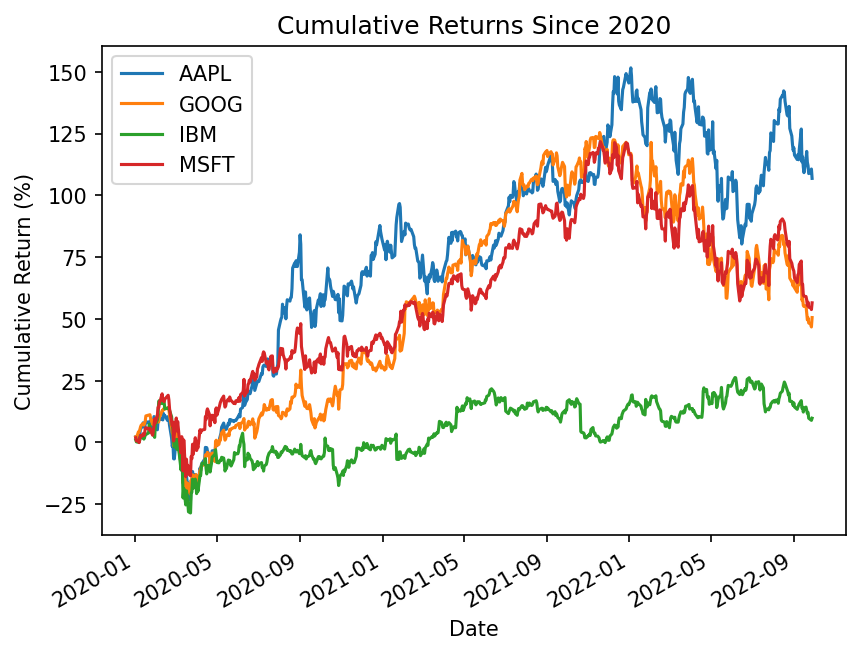

In [174]:
returns.loc['2020':].add(1).cumprod().sub(1).mul(100).plot()
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns Since 2020')
plt.show()

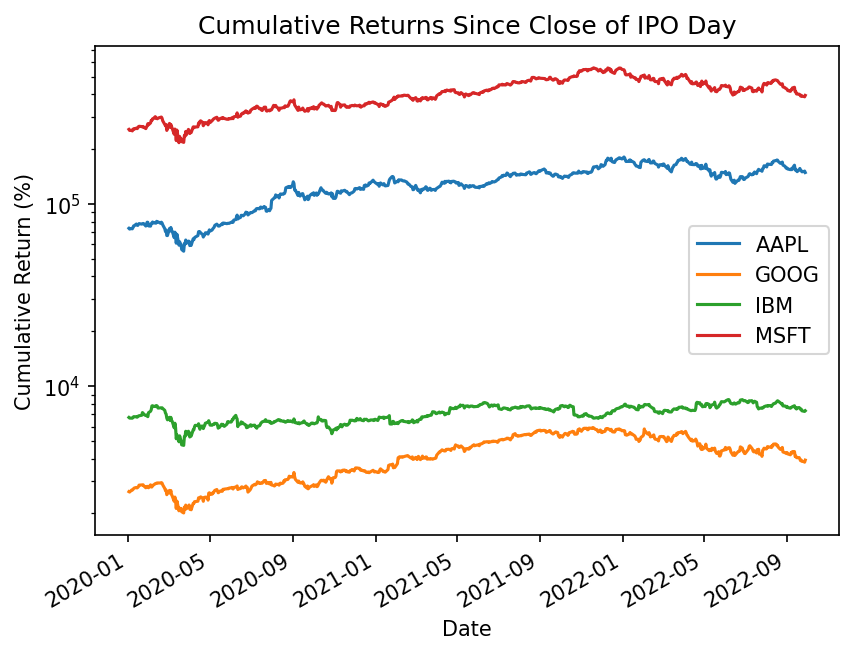

In [175]:
returns.add(1).cumprod().sub(1).mul(100).loc['2020':].plot()
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns Since Close of IPO Day')
plt.semilogy() # I added this after class to use a log-scale on the y axis to improve readability
plt.show()